# testing scrolling

In [1]:
# loading the packages

import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import re
import numpy as np
from collections import Counter

# !pip install webdriver-manager
from webdriver_manager.chrome import ChromeDriverManager

# using for selenium 4
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager


from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

import nltk
# uncomment the following lines if you are running it for the first time
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import contractions
import requests
from wordcloud import WordCloud


import timm
from PIL import Image
from io import BytesIO
from torchvision import transforms, models
from torchvision.transforms.functional import to_pil_image

import torch
import torch.nn as nn

import os
import pinecone

/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pinecone.init(
    api_key=os.environ.get('PINECONE_API_KEY') or '513836a7-99b4-4ebe-b5e5-3d00d17f7910',
    environment=os.environ.get('PINECONE_ENVIRONMENT') or 'asia-southeast1-gcp-free'
)

index_name = 'aicu-bike-search-index'

if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        index_name,
        dimension=512,
        metric='cosine'
    )
    # wait for index to finish initialization
    while not pinecone.describe_index(index_name).status['ready']:
        time.sleep(1)

In [3]:
# service = ChromeService(executable_path=ChromeDriverManager().install())
# driver = webdriver.Chrome(service=service)
# driver.get("https://www.carousell.sg/categories/sports-equipment-10/bicycles-parts-1900/bicycles-247?addRecent=false&canChangeKeyword=false&includeSuggestions=false&sc=0a0208301a0408bbe172220c0a0862696379636c657378012a110a095f64656c69766572793a02080078012a160a0b636f6c6c656374696f6e7312050a0332343778013204080378013a02180742060801100118004a08200128014001480150005a020801&search=bicycles&searchId=6Oyxkt&sort_by=3&tab=marketplace")


# productList = []
# time.sleep(2)
# i = 0

# scroll_pause_time = 1 # You can set your own pause time. My laptop is a bit slow so I use 1 sec
# screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web
# i = 1

# MAX_TRIES = 10  # Set a maximum number of scrolling attempts in case of infinite scrolling pages.

# tries = 0
# previous_scroll_height = 0

# MAX_SCROLLS = 10  # Change this value to the number of scrolls you want.

# scroll_count = 0

# while scroll_count < MAX_SCROLLS:
#     # Scroll one screen height each time
#     driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))
#     time.sleep(scroll_pause_time)
    
#     # Try to find the "Read More" button
#     try:
#         read_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "div.D_Mw > div > button")))
#         if read_more_button:
#             print("Read more button clicked for the", i, "time")
#             read_more_button.click()
#             time.sleep(3)  # Wait after clicking the button for the content to load
#     except:
#         # If not found, then continue scrolling
#         pass

#     # Update the counter
#     scroll_count += 1
#     i += 1

# for x in range(1, 2):
#     products = driver.find_elements(By.CSS_SELECTOR, f"#main > div.D_Mf > div > section.D_Mr > div.D_Mw > div > div > div:nth-child({x}) > div")
#     for product in products: 
#         try:
#             listing_link = product.find_element(By.CSS_SELECTOR, "div > div.D_zX.M_tF > a:nth-child(2)").get_attribute('href')
#         except:
#             try:
#                 listing_link = product.find_element(By.CSS_SELECTOR, "div > div.D_zX > a:nth-child(2)").get_attribute('href')
#             except:
#                 listing_link = None


#         try:
#             product_name = product.find_element(By.CSS_SELECTOR, "div > div.D_zX > a:nth-child(2) > p.D_pw.D_ov.D_px.D_pA.D_pE.D_pH.D_pJ.D_pF.D_pN").text
#         except:
#             try:
#                 product_name = product.find_element(By.CSS_SELECTOR, "div > div.D_zX > a.D__c.D_pW > div.D__g > div > p").text
#             except:
#                 product_name = None

#         try:
#             img_url = product.find_element(By.TAG_NAME, "img").get_attribute('src')
#         except:
#             img_url = None
            
#         try:
#             listing_upload_date = product.find_element(By.CSS_SELECTOR, "div > div.D_zX > a.D__c.D_pW > div.D__g > div > p").text
#         except:
#             listing_upload_date = None

#         data = {
#             "listing_link": listing_link,
#             "product_name": product_name,
#             "img_url": img_url,
#             "listing_upload_date": listing_upload_date
#         }
#         print(data)

#         productList.append(data)

# driver.close()
# driver.quit()

In [4]:
# # everything with None as the product name and listing link is a service ad
# # we can remove them from our dataframe later
# # lets loop through and collect more data

# df = pd.DataFrame(list(productList))
# df.head()

In [5]:
# df.dropna(inplace=True)
# df.shape  

In [6]:
# df.to_csv("carousell.csv")

In [7]:
# # scraping product condition and description

# df = pd.read_csv("carousell.csv")
# df.head()

In [8]:
# def initialize_driver(url):
#     service = ChromeService(executable_path=ChromeDriverManager().install())
#     driver = webdriver.Chrome(service=service)
#     driver.get(url)
#     return driver

In [9]:

# def scroll_page(driver, max_scrolls=10):
#     screen_height = driver.execute_script("return window.screen.height;")
#     i = 1
#     scroll_count = 0
#     while scroll_count < max_scrolls:
#         driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))
#         time.sleep(1)
        
#         try:
#             read_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "div.D_Mw > div > button")))
#             if read_more_button:
#                 print("Read more button clicked for the", i, "time")
#                 read_more_button.click()
#                 time.sleep(3)
#         except:
#             pass
        
#         scroll_count += 1
#         i += 1

In [10]:
# def extract_condition_and_description(link):
#     service = ChromeService(executable_path=ChromeDriverManager().install())
#     driver = webdriver.Chrome(service=service)

#     driver.get(link)

#     try:
#         condition = driver.find_element(By.XPATH, "//*[@id='FieldSetField-Container-field_condition_value']/div/div/div/div/span").text
#     except:
#         condition = None

#     try:
#         driver.find_element(By.XPATH, "//*[@id='FieldSetField-Container-field_listing_details_bp']/div/div[5]/button").click()
#         time.sleep(3)
#         description = driver.find_element(By.CSS_SELECTOR, "#FieldSetField-Container-field_details_bottom_sheet > div > div.D_aCt").text
#     except:
#         description = None

#     driver.close()
#     driver.quit()

#     return condition, description

In [11]:
# def close_driver(driver):
#     driver.close()
#     driver.quit()

In [12]:
# def extract_product_data(driver):
#     productList = []

#     for x in range(1, 3):
#         products = driver.find_elements(By.CSS_SELECTOR, f"#main > div.D_Mf > div > section.D_Mr > div.D_Mw > div > div > div:nth-child({x}) > div")
        
#         for product in products: 
#             # Extract listing link
#             try:
#                 listing_link = product.find_element(By.CSS_SELECTOR, "div > div.D_zX.M_tF > a:nth-child(2)").get_attribute('href')
#             except:
#                 try:
#                     listing_link = product.find_element(By.CSS_SELECTOR, "div > div.D_zX > a:nth-child(2)").get_attribute('href')
#                 except:
#                     listing_link = None

#             # Extract product name
#             try:
#                 product_name = product.find_element(By.CSS_SELECTOR, "div > div.D_zX > a:nth-child(2) > p.D_pw.D_ov.D_px.D_pA.D_pE.D_pH.D_pJ.D_pF.D_pN").text
#             except:
#                 try:
#                     product_name = product.find_element(By.CSS_SELECTOR, "div > div.D_zX > a.D__c.D_pW > div.D__g > div > p").text
#                 except:
#                     product_name = None

#             # Extract image URL
#             try:
#                 img_url = product.find_element(By.TAG_NAME, "img").get_attribute('src')
#             except:
#                 img_url = None

#             # Extract listing upload date
#             try:
#                 listing_upload_date = product.find_element(By.CSS_SELECTOR, "div > div.D_zX > a.D__c.D_pW > div.D__g > div > p").text
#             except:
#                 listing_upload_date = None

#             data = {
#                 "listing_link": listing_link,
#                 "product_name": product_name,
#                 "img_url": img_url,
#                 "listing_upload_date": listing_upload_date
#             }

#             productList.append(data)

#     return productList


In [13]:
# # Main execution
# # url = "https://www.carousell.sg/categories/sports-equipment-10/bicycles-parts-1900/bicycles-247?addRecent=false&canChangeKeyword=false&includeSuggestions=false&sc=0a0208301a0408bbe172220c0a0862696379636c657378012a110a095f64656c69766572793a02080078012a160a0b636f6c6c656374696f6e7312050a0332343778013204080378013a02180742060801100118004a08200128014001480150005a020801&search=bicycles&searchId=6Oyxkt&sort_by=3&tab=marketplace"
# # driver = initialize_driver(url)
# # scroll_page(driver, max_scrolls=10)
# # productList = extract_product_data(driver)
# # close_driver(driver)


# ############################################################################################################


# CHUNK_SIZE = 10

# df = pd.read_csv("carousell.csv")

# if 'condition' not in df.columns:
#     df['condition'] = None
# if 'description' not in df.columns:
#     df['description'] = None

# for i in range(0, len(df), CHUNK_SIZE):
#     chunk = df.iloc[i:i+CHUNK_SIZE]
    
#     for idx, row in chunk.iterrows():
#         try:
#             condition, description = extract_condition_and_description(row['listing_link'])
#             df.at[idx, 'condition'] = condition
#             df.at[idx, 'description'] = description
#         except Exception as e:
#             print(f"Error processing link at index {idx}: {e}")

#     df.to_csv('carousell_updated.csv', index=False)
#     print(f"Processed and saved up to index {idx}")

# df.to_csv('carousell_updated.csv', index=False)

In [14]:
# df1 = pd.read_csv("carousell_raw.csv")
# df1.shape

In [15]:
# df1.dropna(inplace=True)

In [16]:
# df1.shape

In [17]:
# df1.columns

In [18]:
# df1.rename(columns={"Unnamed: 0": "index", "listing_link": "market_link"}, inplace=True)

In [19]:
# df1['market'] = "carousell"

In [20]:
# df1.head()

In [21]:
# from datetime import datetime, timedelta
# import re

# def convert_relative_time_to_datetime(relative_time_str):
#     now = datetime.now()
#     match = re.match(r"(\d+) (\w+)", relative_time_str)
#     if not match:
#         return now

#     num, unit = match.groups()
#     num = int(num)

#     if 'minute' in unit:
#         return now - timedelta(minutes=num)
#     elif 'hour' in unit:
#         return now - timedelta(hours=num)
#     elif 'day' in unit:
#         return now - timedelta(days=num)
#     elif 'week' in unit:
#         return now - timedelta(weeks=num)
#     elif 'month' in unit:
#         return now - timedelta(days=30*num)
#     elif 'year' in unit:
#         return now - timedelta(days=365*num)
#     else:
#         return now

# df1['listing_upload_date'] = df1['listing_upload_date'].apply(convert_relative_time_to_datetime)

In [22]:
# df1.head()

In [23]:
# df1.to_csv("carousell_cleaned_date.csv", index=False)

In [24]:
# df2 = pd.read_csv("carousell_cleaned_date.csv")
# df2.head()

In [25]:
# def get_wordnet_pos(treebank_tag):
#     if treebank_tag.startswith('J'):
#         return nltk.corpus.wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return nltk.corpus.wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return nltk.corpus.wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return nltk.corpus.wordnet.ADV
#     else:
#         return nltk.corpus.wordnet.NOUN  # Default to noun

In [26]:
# def preprocess_text(text):
#     text = text.lower().replace("description", "").replace(" u ", " you ")

#     text = re.sub(r'http\S+', '', text)

#     text = re.sub(r'[^a-zA-Z\s]', '', text)

#     text = contractions.fix(text)

#     words = word_tokenize(text)
#     stop_words = set(stopwords.words('english'))
#     pos_tags = nltk.pos_tag(words)


#     words = [word for word in words if word not in stop_words]

#     lemmatizer = WordNetLemmatizer()
#     words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

#     return ' '.join(words).replace(" u ", " you ")


# df2['description'] = df2['description'].apply(preprocess_text)
# df2.head()

In [27]:
# df2['description'].head()

In [28]:
# df2.to_csv("carousell_cleaned_final.csv", index=False)

In [29]:
# import pandas as pd

# df3 = pd.read_csv("carousell_cleaned_final.csv")
# df3.head()

In [30]:
# df3.drop(columns=['index'], inplace=True)
# df3.head()

In [31]:
# df3.to_csv("carousell_cleaned_final.csv", index=False)

In [32]:
# df4 = pd.read_csv("carousell_cleaned_final.csv")
# df4.head()

In [33]:
# import re
# from nltk.corpus import stopwords
# import nltk


# def clean_title(title):
#     # Remove emojis and special characters
#     title = re.sub(r'[^\x00-\x7F]+', '', title)
    
#     # Remove anything inside brackets
#     title = re.sub(r'\[.*?\]', '', title)
    
#     # Remove any standalone digits and digits within words (e.g., "26 inch" becomes "inch")
#     title = re.sub(r'\b\d+\b', '', title)

#     title = title.lower()
    
#     # Remove promotional phrases known to appear in your data
#     promotional_phrases = ['instocks', "stock", "stocks", "in-stocks", "whatsapp", 'goodmansg', 'goodman', 'good', 'delivery', 'days', "inch"]
#     for phrase in promotional_phrases:
#         title = title.replace(phrase, '')
    
#     # Tokenize the title into words
#     words = title.split()
    
#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     words = [word for word in words if word.lower() not in stop_words]
    
#     # Join the words back into a cleaned title
#     cleaned_title = ' '.join(words)

#     cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_title)
#     cleaned_text = cleaned_text.replace("  ", " ")
    
#     return cleaned_text


# df4['product_name'] = df4['product_name'].apply(clean_title)
# df4.head()


In [34]:
# df4.to_csv("carousell_cleaned_final.csv", index=False)

In [35]:
# import pandas as pd
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Assume df is your DataFrame and 'product_name' is your column of interest
# # df = pd.read_csv('your_data.csv')  # Uncomment and replace 'your_data.csv' with your data file if needed

# # Concatenate all the product names into a single string
# text = " ".join(title for title in df4.product_name)

# # Generate the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# # Display the word cloud using Matplotlib
# plt.figure(figsize=(10a, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')  # Hide the axes
# plt.show()


In [36]:
# import pandas as pd
# from collections import Counter

# # Assume df is your DataFrame and 'product_name' is your column of interest
# # df = pd.read_csv('your_data.csv')  # Uncomment and replace 'your_data.csv' with your data file if needed

# # Tokenize each product name into words
# all_words = " ".join(df4.product_name).split()

# # Count the occurrence of each word
# word_counts = Counter(all_words)

# # Print the words along with their counts
# for word, count in word_counts.items():
#     print(f'{word}: {count}')


In [37]:
# image processing

def get_image(url):
    response = requests.get(url)
    response.raise_for_status()
    img_data = BytesIO(response.content)
    img = Image.open(img_data)
    return img

In [38]:
def preprocess_image(img):
    img = img.convert('RGB')
    
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.ToTensor(),  
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    img_tensor = preprocess(img)
    return img_tensor

In [39]:
url = 'https://media.karousell.com/media/photos/products/2023/10/12/fixie_bicycle_1697119201_3792ad13_progressive_thumbnail.jpg'
image = get_image(url)
processed_image_tensor = preprocess_image(image)
processed_image_tensor

tensor([[[ 0.3823,  0.3994,  0.4166,  ...,  1.5125,  1.5468,  1.1529],
         [ 0.3823,  0.4166,  0.4337,  ...,  1.5125,  1.5297,  1.1187],
         [ 0.3994,  0.4337,  0.4508,  ...,  1.4954,  1.5297,  1.0502],
         ...,
         [-0.4226, -0.4739, -0.4911,  ..., -0.4397, -0.4739, -0.4739],
         [-0.3712, -0.4226, -0.4054,  ..., -0.4911, -0.4911, -0.5253],
         [-0.2856, -0.3712, -0.3369,  ..., -0.4568, -0.4568, -0.4739]],

        [[ 0.6254,  0.6429,  0.6604,  ...,  1.7108,  1.7458,  1.3431],
         [ 0.6254,  0.6604,  0.6779,  ...,  1.7108,  1.7283,  1.3081],
         [ 0.6429,  0.6779,  0.6954,  ...,  1.6933,  1.7283,  1.2381],
         ...,
         [-0.3725, -0.4251, -0.4426,  ..., -0.2675, -0.3025, -0.3025],
         [-0.3200, -0.3725, -0.3550,  ..., -0.3200, -0.3200, -0.3550],
         [-0.2325, -0.3200, -0.2850,  ..., -0.2850, -0.2850, -0.3025]],

        [[ 0.7751,  0.7925,  0.8099,  ...,  1.8731,  1.9080,  1.5071],
         [ 0.7751,  0.8099,  0.8274,  ...,  1

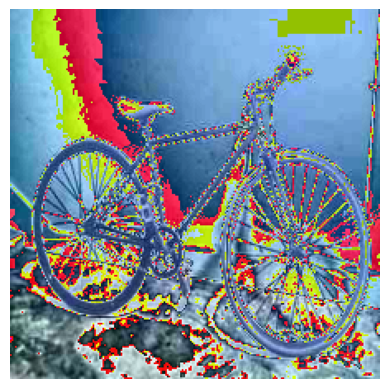

In [40]:
def tensor_to_image(tensor):
    img = to_pil_image(tensor)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

tensor_to_image(processed_image_tensor.squeeze())

In [41]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

def get_text_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1)
    print(embedding.shape)
    return embedding.detach().numpy()

In [42]:
product_title_embedding = get_text_embedding("fnhon foldable bicycle")
print(product_title_embedding)
product_desc_embedding = get_text_embedding("sell fnhon foldable bicycle be on the road less then time disc brake and shimano gear each")

torch.Size([1, 768])
[[-1.76353872e-01 -1.88704282e-01  3.65394473e-01  5.79810217e-02
   2.49094039e-01  6.05963990e-02 -2.54703522e-01  1.82676017e-02
  -4.20383453e-01 -2.88379401e-01  9.62710604e-02  1.07455291e-01
   1.30892709e-01  2.68405914e-01 -1.08759113e-01 -1.29942730e-01
  -2.09869578e-01  1.66314512e-01  1.17660023e-01 -7.07167573e-03
   1.35991096e-01 -1.42225623e-01  4.76307720e-01  1.07465252e-01
   2.38447294e-01  2.12892797e-02  8.37808847e-02  5.77470101e-02
  -6.89291209e-02  1.15684874e-01  7.84619674e-02  2.56842673e-01
   4.88624722e-02 -3.05024236e-02 -1.15426786e-01 -1.97225541e-01
  -7.70052820e-02 -1.09456465e-01 -2.74730444e-01  5.86244911e-02
  -1.26250237e-01 -1.90158308e-01 -2.79994726e-01  9.08416063e-02
   3.14725861e-02 -2.60008629e-02 -5.02856135e-01 -2.05730572e-01
  -7.69691840e-02 -3.22418779e-01 -7.30329990e-01  1.56684250e-01
  -1.21434450e-01  1.91798642e-01  1.81090176e-01  4.37132895e-01
   3.18573155e-02 -3.87718320e-01  4.69944894e-01 -1.79

In [43]:
model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the last classification layer
model.eval()

def get_image_embedding(img_url):
    img = get_image(img_url)
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = preprocess(img).unsqueeze(0)
    with torch.no_grad():
        embedding = model(img_tensor)
    return embedding.squeeze().detach().numpy()


url = 'https://media.karousell.com/media/photos/products/2023/10/12/fixie_bicycle_1697119201_3792ad13_progressive_thumbnail.jpg'
image_embedding = get_image_embedding(url)
image_embedding

/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


array([0.26267794, 1.1283611 , 0.14720105, ..., 0.00929206, 0.04974468,
       0.69566834], dtype=float32)

In [44]:
image_embedding.shape

(2048,)

In [45]:
print("shape of image embedding:", image_embedding.shape)
print("shape of product title embedding:", product_title_embedding.shape) 
print("shape of product desc embedding:", product_desc_embedding.shape)

shape of image embedding: (2048,)
shape of product title embedding: (1, 768)
shape of product desc embedding: (1, 768)


In [46]:
# combine using weights + standardize dimensions

def combine_embeddings(product_title_embedding, product_desc_embedding, image_embedding):
    product_title_embedding = torch.tensor(product_title_embedding, dtype=torch.float32)
    product_desc_embedding = torch.tensor(product_desc_embedding, dtype=torch.float32)
    image_embedding = torch.tensor(image_embedding, dtype=torch.float32)

    fc_title = nn.Linear(768, 512)
    fc_desc = nn.Linear(768, 512)
    fc_image = nn.Linear(2048, 512)

    product_title_embedding_512 = fc_title(product_title_embedding)
    product_desc_embedding_512 = fc_desc(product_desc_embedding)
    image_embedding_512 = fc_image(image_embedding)

    product_title_embedding_normalized = torch.nn.functional.normalize(product_title_embedding_512, p=2, dim=0)
    product_desc_embedding_normalized = torch.nn.functional.normalize(product_desc_embedding_512, p=2, dim=0)
    image_embedding_normalized = torch.nn.functional.normalize(image_embedding_512, p=2, dim=0)

    weight_image = 0.5
    weight_title = 0.25
    weight_desc = 0.25

    weighted_title_embedding = weight_title * product_title_embedding_normalized
    weighted_desc_embedding = weight_desc * product_desc_embedding_normalized
    weighted_image_embedding = weight_image * image_embedding_normalized

    combined_embedding = weighted_title_embedding + weighted_desc_embedding + weighted_image_embedding

    return combined_embedding

In [47]:
embedding = combine_embeddings(product_title_embedding, product_desc_embedding, image_embedding)

In [48]:
embedding

tensor([[ 5.1420e-01,  4.0130e-02, -1.2246e-02,  8.6690e-03, -1.5675e-03,
          4.7118e-01,  4.8079e-01,  4.8808e-01, -1.1952e-02, -9.4630e-03,
          1.2950e-02, -5.1701e-01,  7.8593e-03, -6.4035e-03, -1.8308e-02,
         -4.6369e-01, -1.1709e-02,  4.9661e-01, -5.0247e-01,  4.6105e-01,
         -4.9219e-01,  1.1616e-02,  5.1245e-01, -4.8057e-01,  4.8373e-01,
          6.6199e-03,  2.1220e-02,  1.2880e-02,  5.1359e-01, -4.9274e-01,
         -5.2860e-01,  9.0599e-03, -1.1287e-02,  9.9645e-03, -4.6390e-01,
         -4.5562e-01,  4.9490e-01, -5.4370e-01, -4.7580e-01, -5.6079e-04,
          5.4230e-01,  4.9760e-01, -5.0358e-01, -4.7082e-01,  1.7955e-02,
         -1.1611e-02, -6.2061e-02,  4.8736e-01, -4.8606e-01, -5.3185e-01,
          6.8380e-03, -3.9977e-02,  4.9907e-01,  5.0798e-01, -2.7545e-02,
          3.0881e-02,  4.9513e-01, -4.2966e-02, -4.6582e-01, -4.9219e-01,
         -4.7236e-01, -4.8923e-01, -5.3873e-03,  5.0862e-01,  1.0310e-02,
         -4.9416e-01, -1.9569e-02,  4.

In [49]:
df = pd.read_csv("carousell_cleaned_final.csv")
print(df.columns)
print(len(df))

Index(['market_link', 'product_name', 'img_url', 'listing_upload_date',
       'condition', 'description', 'market'],
      dtype='object')
320


In [50]:
index_name = 'aicu-bike-search-index'
index = pinecone.Index(index_name)
index.describe_index_stats()

{'dimension': 512,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 320}},
 'total_vector_count': 320}

In [51]:
# Load the text embedding model
text_model = AutoModel.from_pretrained("bert-base-uncased")

# Load the image embedding model
image_model = models.resnet50(pretrained=True)
image_model = torch.nn.Sequential(*list(image_model.children())[:-1])  # Remove the last classification layer
image_model.eval()

def get_text_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = text_model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1)
    return embedding.detach().numpy()

def get_image_embedding(img_url):
    img = get_image(img_url)
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = preprocess(img).unsqueeze(0)
    with torch.no_grad():
        embedding = image_model(img_tensor)
    return embedding.squeeze().detach().numpy()

/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [52]:
url = 'https://media.karousell.com/media/photos/products/2023/10/12/fixie_bicycle_1697119201_3792ad13_progressive_thumbnail.jpg'
image_embedding = get_image_embedding(url)
print(image_embedding)

[0.26267794 1.1283611  0.14720105 ... 0.00929206 0.04974468 0.69566834]


In [53]:
title = "fnhon foldable bicycle"
desc = "sell fnhon foldable bicycle be on the road less then time disc brake and shimano gear each"
title_embedding = get_text_embedding(title)
desc_embedding = get_text_embedding(desc)
# print(title_embedding)
# print(desc_embedding)

In [54]:
import hashlib

def get_hash(value):
    return hashlib.md5(value.encode()).hexdigest()

In [55]:
# batch_size = 32
# for i in range(0, len(df), batch_size):
#     i_end = min(len(df), i+batch_size)
#     batch = df.iloc[i:i_end]
#     ids = [get_hash(str(idx)) for idx in batch['market_link']]  # Assuming the DataFrame index is unique
#     product_title_embeddings = [get_text_embedding(x['product_name']) for i, x in batch.iterrows()]
#     product_desc_embeddings = [get_text_embedding(desc) for desc in batch['description']]
#     # Flatten the text embeddings
#     # product_title_embeddings = [title.flatten() for title in product_title_embeddings]
#     # product_desc_embeddings = [desc.flatten() for desc in product_desc_embeddings]
#     image_embeddings = [get_image_embedding(img_url) for img_url in batch['img_url']]
#     embeds = [combine_embeddings(title, desc, img).detach().numpy().tolist() for title, desc, img in zip(product_title_embeddings, product_desc_embeddings, image_embeddings)]
#     metadata = [
#         {
#             'listing_link': row['market_link'],
#             'product_name': row['product_name'],
#             'img_url': row['img_url'],
#             'listing_upload_date': row['listing_upload_date'],
#             'condition': row['condition'],
#             'description': row['description'],
#             'market': row['market']
#         } for idx, row in batch.iterrows()
#     ]
#     # Add to Pinecone
#     index.upsert(vectors=zip(ids, embeds, metadata))

In [56]:
print(index.describe_index_stats())

{'dimension': 512,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 320}},
 'total_vector_count': 320}


In [1]:
# testing the query function
def testing_query():
    top_k = 10
    title = "btwin bicycle"
    desc = "btwin cycle with 6 gears and 2 disc brakes"
    url = "https://media.karousell.com/media/photos/products/2023/10/12/hybride_riverside_btwin_bike_1697097346_38aca47c_progressive_thumbnail.jpg"

    query_title_embedding = get_text_embedding(title)
    query_desc_embedding = get_text_embedding(desc)
    query_image_embedding = get_image_embedding(url)
    query_combined_embedding = combine_embeddings(query_title_embedding, 
    query_desc_embedding, query_image_embedding)

    query_vector = query_combined_embedding.tolist()
    result = index.query(vector=query_vector, top_k=top_k,
    include_metadata=True)
    # metadata_entries = index.fetch_metadata(ids=result.ids)
    
    return result['matches']

In [2]:
testing_query()

NameError: name 'get_text_embedding' is not defined

In [83]:
import gradio as gr

def query_and_display(title, desc, image_url):
    query_title_embedding = get_text_embedding(title)
    query_desc_embedding = get_text_embedding(desc)
    query_image_embedding = get_image_embedding(image_url)  # Assuming image_url is processed correctly in this function
    
    query_combined_embedding = combine_embeddings(query_title_embedding, 
                                                  query_desc_embedding, 
                                                  query_image_embedding)

    query_vector = query_combined_embedding.tolist()
    result = index.query(vector=query_vector, top_k=10, include_metadata=True)['matches']

    # Add a heading and display the input image at the top
    output_html = f"""
    <h1>Online Marketplace Search</h1>
    <h2>My Bike</h2>
    <img src='{image_url}' alt='My Bike Image' width='150'><br>
    Title: {title}<br>
    Description: {desc}<br>
    <hr>
    """

    for match in result:
        metadata = match['metadata']
        listing_link = metadata['listing_link']
        img_url = metadata['img_url']
        product_name = metadata['product_name']
        description = metadata['description']
        condition = metadata['condition']
        listing_upload_date = metadata['listing_upload_date'].strftime('%Y-%m-%d %H:%M:%S')

        output_html += f"""
        <div style='border:1px solid black; padding:10px; margin:10px'>
            <h1>Results</h1>
            <h3><a href='{listing_link}'>{product_name}</a></h3>
            <img src='{img_url}' alt='{product_name}' width='150'>
            <p>{description}</p>
            <p>Condition: {condition}</p>
            <p>Listing Date: {listing_upload_date}</p>
        </div>
        """
        
    return output_html

iface = gr.Interface(
    fn=query_and_display, 
    inputs=["text", "text", "text"], 
    outputs=gr.outputs.HTML(),  # Specifying the HTML output component
    live=True
)

iface.launch()

Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/gradio/routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/gradio/route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/gradio/blocks.py", line 1554, in process_api
    result = await self.call_function(
  File "/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/gradio/blocks.py", line 1192, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/Users/daaa/Downloads/AICU-APP/venv/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in